In [48]:
# Import necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox,inv_boxcox
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.api import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [49]:
pred_accident = pd.read_csv('/content/drive/My Drive/AIT/Thesis/pred_accident.csv')

In [50]:
pred_accident.head(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Casualty_Gender,Avg_Casualty_Age,Hour,Min
0,525130,180050,-0.198465,51.505538,1,3,1,1,2,12,E09000020,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,Majority Female,41.0,18,45
1,526530,178560,-0.178838,51.491836,1,3,1,1,2,12,E09000020,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,Majority Male,24.0,7,50
2,524610,181080,-0.205590,51.514910,1,3,1,1,2,12,E09000020,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,Majority Female,33.0,18,8
3,524420,181080,-0.208327,51.514952,1,3,1,1,3,12,E09000020,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,Majority Female,9.0,7,40
4,524630,179040,-0.206022,51.496572,1,2,2,1,6,12,E09000020,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,Majority Male,48.0,7,30


In [51]:
pred_accident_cc = pred_accident.drop(['Number_of_Vehicles', 'Local_Authority_(Highway)', 'Casualty_Gender', 'Avg_Casualty_Age'], 
                              axis = 1).reset_index(drop = True)

In [52]:
pred_accident_cc.head(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Min
0,525130,180050,-0.198465,51.505538,1,3,1,2,12,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,18,45
1,526530,178560,-0.178838,51.491836,1,3,1,2,12,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,7,50
2,524610,181080,-0.205590,51.514910,1,3,1,2,12,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,18,8
3,524420,181080,-0.208327,51.514952,1,3,1,3,12,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,7,40
4,524630,179040,-0.206022,51.496572,1,2,1,6,12,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,7,30


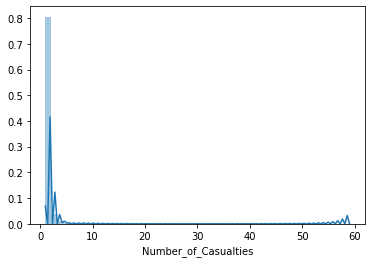

In [53]:
sns.distplot(pred_accident_cc['Number_of_Casualties'])

In [54]:
skew(pred_accident_cc['Number_of_Casualties'])

6.75622374197282

In [55]:
pred_accident_cc['Number_of_Casualties'].describe()

count    529103.000000
mean          1.320924
std           0.779283
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          59.000000
Name: Number_of_Casualties, dtype: float64

In [56]:
Counter(pred_accident_cc['Number_of_Casualties'])

Counter({1: 415656,
         2: 78373,
         3: 22493,
         4: 7892,
         5: 2872,
         6: 1068,
         7: 364,
         8: 161,
         9: 73,
         10: 58,
         11: 21,
         12: 19,
         13: 7,
         14: 8,
         15: 4,
         16: 6,
         17: 4,
         18: 1,
         19: 2,
         20: 1,
         21: 2,
         23: 2,
         24: 1,
         26: 1,
         27: 3,
         29: 1,
         33: 1,
         34: 2,
         35: 1,
         36: 2,
         38: 1,
         42: 1,
         58: 1,
         59: 1})

In [57]:
#pred_accident_cc = pred_accident_cc[pred_accident_cc['Number_of_Casualties'] < 7]

In [58]:
#pred_accident_cc['Number_of_Casualties'].describe()

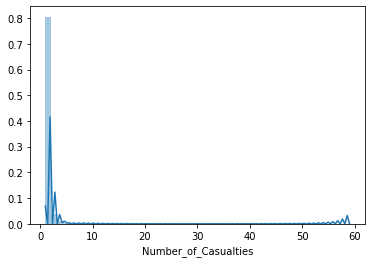

In [59]:
sns.distplot(pred_accident_cc['Number_of_Casualties'])

In [60]:
skew(pred_accident_cc['Number_of_Casualties'])

6.75622374197282

In [61]:
# Function to calculate VIF
def calc_vif(X):
    vif_df = pd.DataFrame()
    vif_df["variables"] = X.columns
    vif_df["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
    return(vif_df)

In [62]:
X = pred_accident_cc.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Location_Easting_OSGR,30173.630641
1,Location_Northing_OSGR,136.346064
2,Longitude,2437.650905
3,Latitude,46010.033849
4,Police_Force,85.639861
5,Accident_Severity,45.978628
6,Number_of_Casualties,4.012411
7,Day_of_Week,5.571848
8,Local_Authority_(District),94.566499
9,1st_Road_Class,12.710709


In [63]:
pred_accident_cc_dummy = pred_accident_cc.drop(['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Local_Authority_(District)'], 
                                      axis = 1)

In [64]:
pred_accident_cc_dummy.head(5)

,Police_Force,Accident_Severity,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Min
0,1,3,1,2,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,18,45
1,1,3,1,2,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,7,50
2,1,3,1,2,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,18,8
3,1,3,1,3,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,7,40
4,1,2,1,6,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,7,30


In [65]:
X = pred_accident_cc_dummy.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Police_Force,2.608208
1,Accident_Severity,24.583087
2,Number_of_Casualties,3.915028
3,Day_of_Week,5.363183
4,1st_Road_Class,10.711308
5,1st_Road_Number,1.362502
6,Road_Type,11.708645
7,Speed_limit,16.787171
8,Junction_Detail,3.982934
9,Junction_Control,10.713804


In [66]:
pred_accident_cc_dummy = pd.get_dummies(pred_accident_cc_dummy, columns = ['Police_Force', 'Accident_Severity', 'Day_of_Week',
                                                                 '1st_Road_Class', 'Road_Type', 'Junction_Detail',
                                                                 'Junction_Control', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control',
                                                                 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
                                                                 'Weather_Conditions', 'Road_Surface_Conditions',
                                                                 'Special_Conditions_at_Site', 'Carriageway_Hazards',
                                                                 'Urban_or_Rural_Area'])

In [67]:
pred_accident_cc_dummy.head(5)

,Number_of_Casualties,1st_Road_Number,Speed_limit,2nd_Road_Number,Hour,Min,Police_Force_1,Police_Force_3,Police_Force_4,Police_Force_5,Police_Force_6,Police_Force_7,Police_Force_10,Police_Force_11,Police_Force_12,Police_Force_13,Police_Force_14,Police_Force_16,Police_Force_17,Police_Force_20,Police_Force_21,Police_Force_22,Police_Force_23,Police_Force_30,Police_Force_31,Police_Force_32,Police_Force_33,Police_Force_34,Police_Force_35,Police_Force_36,Police_Force_37,Police_Force_40,Police_Force_41,Police_Force_42,Police_Force_43,Police_Force_44,Police_Force_45,Police_Force_46,Police_Force_47,Police_Force_48,...,Light_Conditions_4,Light_Conditions_5,Light_Conditions_6,Light_Conditions_7,Weather_Conditions_-1,Weather_Conditions_1,Weather_Conditions_2,Weather_Conditions_3,Weather_Conditions_4,Weather_Conditions_5,Weather_Conditions_6,Weather_Conditions_7,Weather_Conditions_8,Weather_Conditions_9,Road_Surface_Conditions_-1,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Surface_Conditions_5,Special_Conditions_at_Site_-1,Special_Conditions_at_Site_0,Special_Conditions_at_Site_1,Special_Conditions_at_Site_2,Special_Conditions_at_Site_3,Special_Conditions_at_Site_4,Special_Conditions_at_Site_5,Special_Conditions_at_Site_6,Special_Conditions_at_Site_7,Carriageway_Hazards_-1,Carriageway_Hazards_0,Carriageway_Hazards_1,Carriageway_Hazards_2,Carriageway_Hazards_3,Carriageway_Hazards_6,Carriageway_Hazards_7,Urban_or_Rural_Area_-1,Urban_or_Rural_Area_1,Urban_or_Rural_Area_2,Urban_or_Rural_Area_3
0,1,0,30,0,18,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0,30,3218,7,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,415,30,0,18,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1,450,30,0,7,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,315,30,3220,7,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [68]:
X = pred_accident_cc_dummy.drop(['Number_of_Casualties'], axis = 1)
y = pred_accident_cc_dummy['Number_of_Casualties']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
# Linear regression using OLS method
reg_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Number_of_Casualties   R-squared:                       0.045
Model:                              OLS   Adj. R-squared:                  0.045
Method:                   Least Squares   F-statistic:                     127.8
Date:                  Sun, 12 Jul 2020   Prob (F-statistic):               0.00
Time:                          18:38:36   Log-Likelihood:            -4.2291e+05
No. Observations:                370372   AIC:                         8.461e+05
Df Residuals:                    370233   BIC:                         8.476e+05
Df Model:                           138                                         
Covariance Type:              nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
1st_Road_Number                            -1.461e-06   8.91e-07     -1.640      0.101   -3.21e-06    2.85e-07
Speed_limit                                    0.0060      0.000     40.842      0.000       0.006       0.006
2nd_Road_Number                             4.111e-07   1.31e-06      0.314      0.753   -2.15e-06    2.97e-06
Hour                                           0.0046      0.000     18.174      0.000       0.004       0.005
Min                                            0.0005   7.12e-05      6.809      0.000       0.000       0.001
Police_Force_1                                -0.0421      0.004     -9.519      0.000      -0.051      -0.033
Police_Force_3                                -0.0021      0.013     -0.166      0.868      -0.027       0.023
Police_Force_4                                 0.1094      0.008     13.582      0.000       0.094       0.125
Police_Force_5                                 0.1146      0.010     12.003      0.000       0.096       0.133
Police_Force_6                                 0.0770      0.008      9.300      0.000       0.061       0.093
Police_Force_7                                -0.0315      0.010     -3.210      0.001      -0.051      -0.012
Police_Force_10                                0.0437      0.009      4.824      0.000       0.026       0.061
Police_Force_11                                0.0833      0.014      5.884      0.000       0.056       0.111
Police_Force_12                               -0.0271      0.011     -2.554      0.011      -0.048      -0.006
Police_Force_13                                0.0729      0.007     10.209      0.000       0.059       0.087
Police_Force_14                                0.1000      0.009     11.340      0.000       0.083       0.117
Police_Force_16                                0.0517      0.010      5.376      0.000       0.033       0.071
Police_Force_17                                0.0914      0.016      5.566      0.000       0.059       0.124
Police_Force_20                                0.1093      0.007     16.447      0.000       0.096       0.122
Police_Force_21                                0.0668      0.010      6.594      0.000       0.047       0.087
Police_Force_22                               -0.0096      0.010     -0.961      0.337      -0.029       0.010
Police_Force_23                                0.0012      0.012      0.095      0.925      -0.023       0.025
Police_Force_30                                0.0126      0.011      1.163      0.245      -0.009       0.034
Police_Force_31                                0.0175      0.009      1.879      0.060      -0.001       0.036
Police_Force_32                               -0.0216      0.010

In [71]:
y_pred = reg_OLS.predict(X_test)

In [72]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred,0)})
pred_df.head(10)

,Actual,Predicted
168250,1,1.0
230130,2,1.0
384671,1,1.0
345447,1,2.0
86197,1,1.0
82456,1,1.0
184511,2,1.0
499836,1,1.0
123737,1,2.0
43331,1,1.0


In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.47618269741259034
Mean Squared Error: 0.5937348572719413
Root Mean Squared Error: 0.7705419244090105
R2 Score: 0.042091948317541816


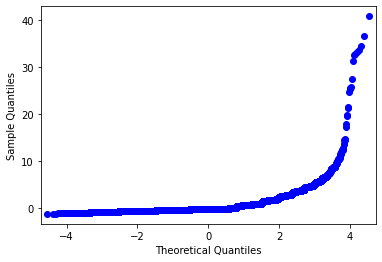

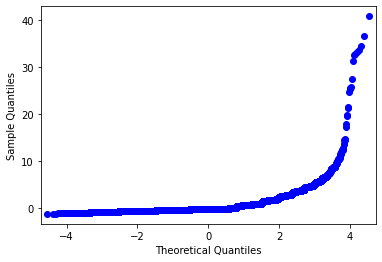

In [74]:
qqplot(reg_OLS.resid)

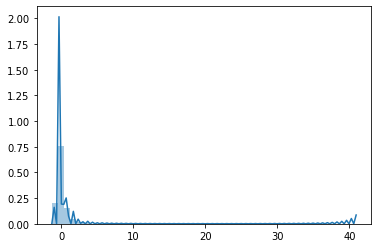

In [75]:
sns.distplot(reg_OLS.resid)

In [76]:
Counter(np.round(y_pred,0))

Counter({1.0: 134139, 2.0: 24592})

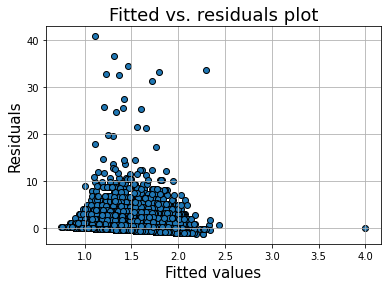

In [77]:
plt.scatter(x=reg_OLS.fittedvalues,y=reg_OLS.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)

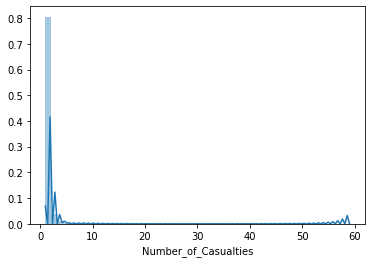

In [78]:
sns.distplot(pred_accident_cc['Number_of_Casualties'])

In [79]:
Counter(pred_accident_cc['Number_of_Casualties'])

Counter({1: 415656,
         2: 78373,
         3: 22493,
         4: 7892,
         5: 2872,
         6: 1068,
         7: 364,
         8: 161,
         9: 73,
         10: 58,
         11: 21,
         12: 19,
         13: 7,
         14: 8,
         15: 4,
         16: 6,
         17: 4,
         18: 1,
         19: 2,
         20: 1,
         21: 2,
         23: 2,
         24: 1,
         26: 1,
         27: 3,
         29: 1,
         33: 1,
         34: 2,
         35: 1,
         36: 2,
         38: 1,
         42: 1,
         58: 1,
         59: 1})

In [81]:
pred_accident_rf = pred_accident_cc.copy()
pred_accident_rf.head(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Min
0,525130,180050,-0.198465,51.505538,1,3,1,2,12,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,18,45
1,526530,178560,-0.178838,51.491836,1,3,1,2,12,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,7,50
2,524610,181080,-0.205590,51.514910,1,3,1,2,12,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,18,8
3,524420,181080,-0.208327,51.514952,1,3,1,3,12,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,7,40
4,524630,179040,-0.206022,51.496572,1,2,1,6,12,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,7,30


In [82]:
pred_accident_rf = pred_accident_rf.drop(['Location_Easting_OSGR','Location_Northing_OSGR','Longitude','Latitude','Local_Authority_(District)'], 
                                      axis = 1)
pred_accident_rf.head(5)

,Police_Force,Accident_Severity,Number_of_Casualties,Day_of_Week,1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Min
0,1,3,1,2,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,18,45
1,1,3,1,2,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,7,50
2,1,3,1,2,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,18,8
3,1,3,1,3,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,7,40
4,1,2,1,6,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,7,30


In [83]:
X = pred_accident_rf.drop(['Number_of_Casualties'], axis = 1)
y = pred_accident_rf['Number_of_Casualties']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# Random Forest Regressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [86]:
y_pred = reg_rf.predict(X_test)

In [87]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred,0)})
pred_df.head(10)

,Actual,Predicted
168250,1,2.0
230130,2,1.0
384671,1,1.0
345447,1,2.0
86197,1,1.0
82456,1,1.0
184511,2,1.0
499836,1,1.0
123737,1,2.0
43331,1,1.0


In [88]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5054946437682482
Mean Squared Error: 0.6482864381433106
Root Mean Squared Error: 0.8051623675652697
R2 Score: -0.045919388575817344


In [89]:
# KNN Regressor
#rmse_val = [] #to store rmse values for different k
#k = [50, 100, 150, 200, 250, 300]
#for K in k:
#    model = KNeighborsRegressor(n_neighbors = K)
#    model.fit(X_train, y_train)  #fit the model
#    pred=model.predict(X_test) #make prediction on test set
#    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
#    rmse_val.append(error) #store rmse values
#    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  50 is: 0.7811551271561475
RMSE value for k=  100 is: 0.7782284333604621
RMSE value for k=  150 is: 0.7773461562422838
RMSE value for k=  200 is: 0.7768637416503313
RMSE value for k=  250 is: 0.7766796119446783
RMSE value for k=  300 is: 0.776658381805873


In [90]:
# KNN Regressor
#rmse_val = [] #to store rmse values for different k
#k = [350, 400, 450, 500, 550, 600]
#for K in k:
#    model = KNeighborsRegressor(n_neighbors = K)
#    model.fit(X_train, y_train)  #fit the model
#    pred=model.predict(X_test) #make prediction on test set
#    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
#    rmse_val.append(error) #store rmse values
#    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  350 is: 0.7766727265787191
RMSE value for k=  400 is: 0.7765924979399997
RMSE value for k=  450 is: 0.7765836392288633
RMSE value for k=  500 is: 0.7766268196030512
RMSE value for k=  550 is: 0.7766667888958713
RMSE value for k=  600 is: 0.7767252474661274


In [91]:
# k = 450 is selected since rmse is lowest
reg_knn = KNeighborsRegressor(n_neighbors = 450)
reg_knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=450, p=2,
                    weights='uniform')

In [92]:
y_pred = reg_knn.predict(X_test)

In [93]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred,0)})
pred_df.head(10)

,Actual,Predicted
168250,1,1.0
230130,2,1.0
384671,1,1.0
345447,1,2.0
86197,1,1.0
82456,1,1.0
184511,2,1.0
499836,1,1.0
123737,1,2.0
43331,1,1.0


In [94]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.4831795651483048
Mean Squared Error: 0.6030821487179453
Root Mean Squared Error: 0.7765836392288633
R2 Score: 0.027011402468018475
